# Tugas Pemrograman MATH 1042 – Peluang dan Statistika
# Proyek 2A: Survei Kepuasan Bandara

**Mengimpor <em>libraries</em>**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

**Mengimpor dataset**

In [5]:
dataset = pd.read_csv("airport-quarterly-passenger-survey-1.csv")
dataset

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,3Q16,09/04/2016,11:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,4.0,5.0,2.0,4.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,2Q16,05/01/2016,16:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,3.0,3.0,0.0,2.0,3.0,5.0,5.0,4.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,2Q16,04/07/2016,11:10,4.0,4.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,0.0,NaN,0.0,0.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,3Q16,09/02/2016,17:16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,4.0,4.0,2.0,3.0,4.0,4.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,3Q16,08/04/2016,7:49,5.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,2.0,3.0,2.0,3.0,4.0,3.0,5.0,0.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,2Q17,04/09/2017,11:30 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0
3497,2Q17,04/10/2017,10:35 AM,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0,0.0,4.0
3498,2Q17,05/11/2017,1:42 PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0
3499,2Q17,06/03/2017,5:05 PM,5.0,0.0,0.0,0.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,5.0,5.0,0.0,4.0,4.0,3.0,0.0,0.0,5.0,5.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quarter                                       3501 non-null   object 
 1   Date recorded                                 3501 non-null   object 
 2   Departure time                                3501 non-null   object 
 3   Ground transportation to/from airport         3447 non-null   float64
 4   Parking facilities                            3462 non-null   float64
 5   Parking facilities (value for money)          3455 non-null   float64
 6   Availability of baggage carts                 3410 non-null   float64
 7   Efficiency of check-in staff                  3463 non-null   float64
 8   Check-in wait time                            3462 non-null   float64
 9   Courtesy of of check-in staff                 3449 non-null   f

## 1. Memilih tiga layanan yang akan dianalisis

In [7]:
def choose_feature(dataset):
  chosen_feature = set()
  for key, val in dataset.mean().sort_values()[0:3].items():
    chosen_feature.add(dataset.columns.get_loc(key))
  return chosen_feature

In [8]:
feature_index = choose_feature(dataset)
for index in feature_index:
  print(dataset.columns[index])

Business/executive lounges
Ease of making connections
Availability of banks/ATM/money changing


**Memfilter dataset**

In [9]:
# Filtered Dataset
col_index = list(feature_index)
col_index.append(0)
col_index.sort()
df = dataset.iloc[:,col_index]
df

,Quarter,Ease of making connections,Availability of banks/ATM/money changing,Business/executive lounges
0,3Q16,0.0,0.0,0.0
1,2Q16,0.0,0.0,0.0
2,2Q16,0.0,0.0,0.0
3,3Q16,0.0,0.0,0.0
4,3Q16,0.0,3.0,2.0
...,...,...,...,...
3496,2Q17,0.0,0.0,0.0
3497,2Q17,0.0,0.0,0.0
3498,2Q17,0.0,0.0,0.0
3499,2Q17,0.0,4.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Quarter                                   3501 non-null   object 
 1   Ease of making connections                3418 non-null   float64
 2   Availability of banks/ATM/money changing  3460 non-null   float64
 3   Business/executive lounges                3410 non-null   float64
dtypes: float64(3), object(1)
memory usage: 109.5+ KB


Dapat dilihat bahwa pada dataframe yang telah difilter masih terdapat beberapa sel yang kosong. Oleh karena itu, sel kosong tersebut akan diisi dengan nilai rata-rata dari kolom tempat sel tersebut berada.

In [11]:
for i in range(len(df.columns)):
  if (i != 0):
    feature_median = df[df.columns[i]].median()
    df[df.columns[i]].fillna(feature_median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Quarter                                   3501 non-null   object 
 1   Ease of making connections                3501 non-null   float64
 2   Availability of banks/ATM/money changing  3501 non-null   float64
 3   Business/executive lounges                3501 non-null   float64
dtypes: float64(3), object(1)
memory usage: 109.5+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## 2. Nilai rata-rata dan standar deviasi nilai kepuasan populasi pengunjung

In [12]:
from scipy.stats import t
from scipy.stats import chi2

def mean_population_interval(dataset, conf_rate):
  num_sample = len(dataset)
  p = 1 - (1-conf_rate)/2
  dof = num_sample-1
  t_value = t.ppf(p, dof)
  sample_mean = dataset.mean()
  sample_std = dataset.std()
  margin_of_error = t_value * sample_std / math.sqrt(num_sample)
  interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
  return interval

def std_population_interval(dataset, conf_rate):
  num_sample = len(dataset)
  bot_p = (1-conf_rate)/2
  top_p = 1 - bot_p
  dof = num_sample-1
  sample_squared = dataset**2
  sum_sample_squared = sample_squared.sum()
  sum_sample = dataset.sum()
  squared_sum_sample = sum_sample**2
  variance = (num_sample*sum_sample_squared - squared_sum_sample) / (num_sample*(num_sample-1))
  chi_bot = chi2.ppf(bot_p, dof)
  chi_top = chi2.ppf(top_p, dof)
  interval = (math.sqrt((num_sample - 1)*variance/chi_top), math.sqrt((num_sample - 1)*variance/chi_bot))
  return interval

### 2.a. Nilai rata-rata

In [13]:
#Ease of making connections
mean_population_interval(df[df.columns[1]], 0.95)

(0.3110066611546219, 0.39222098808845157)

In [14]:
#Availability of banks/ATM/money changing
mean_population_interval(df[df.columns[2]], 0.95)

(0.8326193704438916, 0.9445871419811298)

In [15]:
#Business/executive lounges 
mean_population_interval(df[df.columns[3]], 0.95)

(0.42843914050921733, 0.5147199568915253)

### 2.b. Nilai standar deviasi

In [16]:
std_population_interval(df[df.columns[1]], 0.95)

(1.1974185875101804, 1.254863421356279)

In [17]:
std_population_interval(df[df.columns[2]], 0.95)

(1.6508453114438693, 1.7300427914317917)

In [18]:
std_population_interval(df[df.columns[3]], 0.95)

(1.2721185680194267, 1.3331470509030627)

## 3. Visualization

In [19]:
def show_per_quarter_graph(dataset, service, axes, col):
  quarters = dataset['Quarter'].unique()
  quarters.sort()
  dict_quarters = dict()
  for quarter in quarters:
    year = "20" + quarter[2:]
    if year not in dict_quarters:
      dict_quarters[year] = list()
    dict_quarters[year].append(quarter)  
 
  mean_intervals = []
  std_intervals = []
  for year in dict_quarters:
    for quarter in dict_quarters[year]:
      df = dataset[dataset['Quarter']==quarter][service]
      mean_intervals.append(mean_population_interval(df, 0.95))
      std_intervals.append(std_population_interval(df, 0.95))
  
  y_err_mean = []
  mid_interval_mean = []

  y_err_std = []
  mid_interval_std = []
  
  for interval in mean_intervals:
    mid = (interval[0]+interval[1])/2
    err = interval[1]-mid
    y_err_mean.append(err)
    mid_interval_mean.append(mid)

  for interval in std_intervals:
    mid = (interval[0]+interval[1])/2
    err = interval[1]-mid
    y_err_std.append(err)
    mid_interval_std.append(mid)

  x = [i for i in range(1, len(quarters)+1)]

  number_to_text = {1 : "First",
                    2 : "Second",
                    3 : "Third",
                    4 : "Fourth"}
  keys = list(dict_quarters.keys())
  begin_year = keys[0]
  end_year = keys[len(keys)-1]
  begin_quarter = int(dict_quarters[begin_year][0][0:1])
  end_quarter = len(dict_quarters[end_year])
  axes[col].errorbar(x, mid_interval_std, yerr = y_err_std, capsize=2, marker = ".", markersize=7., fmt="o", label="std")
  axes[col].errorbar(x , mid_interval_mean, yerr = y_err_mean, capsize=2, marker = ".", markersize=7., fmt="o", label="mean")
  axes[col].set_title(service)
  axes[col].grid(True, linewidth=1, color='white', linestyle='-')
  axes[col].set_facecolor("lavender")
  axes[col].set_ylabel("Score")
  axes[col].set_xticks(x)
  axes[col].set_xlabel("Quarter (%s quarter of %s till %s quarter of %s)" %(number_to_text[begin_quarter], begin_year, number_to_text[end_quarter], end_year))
  axes[col].legend()


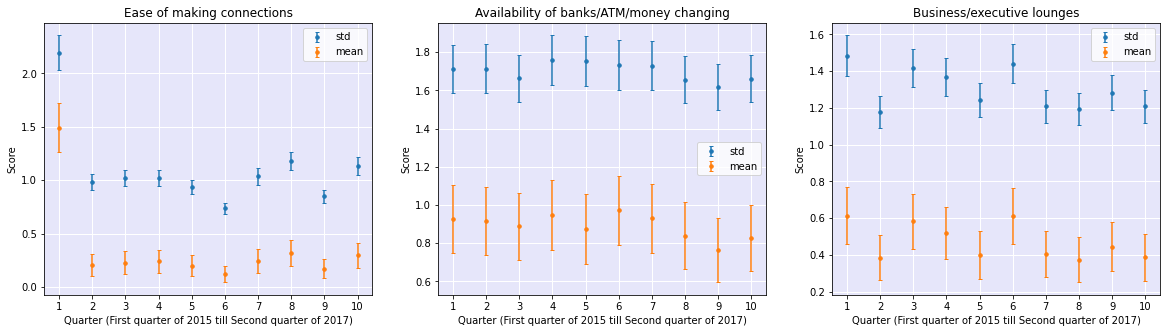

In [20]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
show_per_quarter_graph(df, df.columns[1], ax, 0)
show_per_quarter_graph(df, df.columns[2], ax, 1)
show_per_quarter_graph(df, df.columns[3], ax, 2)

## 4. Pertanyaan diskusi

### 4.a. Menentukan batas bawah skor kepuasan *s*, sehingga kita dapat cukup yakin bahwa 95% total pengunjung bandara pasti memberikan penilaian lebih besar atau sama dengan *s*

In [21]:
#Ease of making connections
mean_population_interval(df[df.columns[1]], 0.90)[0]

0.31753798444928527

In [22]:
#Availability of banks/ATM/money changing
mean_population_interval(df[df.columns[2]], 0.90)[0]

0.8416239111709057

In [23]:
#Business/executive lounges 
mean_population_interval(df[df.columns[3]], 0.90)[0]

0.4353779150727187

### 4.b. Inferensi statistika untuk proporsi banyaknya responden yang tergolong 'puas' terhadap layanan apabila diasumsikan seseorang tergolong 'puas' terhadap suatu layanan jika ia mengisi skor lebih besar atau sama dengan 4. 

In [24]:
def proportion(dataset):
  num_sample = len(dataset)
  dof = num_sample-1
  sample_mean = dataset.mean()
  sample_std = dataset.std()
  t_value = (-4 + sample_mean)/(sample_std/math.sqrt(num_sample))
  p = t.cdf(t_value, dof)
  return p

In [25]:
#Ease of making connections
proportion(df[df.columns[1]])

0.0

In [26]:
#Availability of banks/ATM/money changing
proportion(df[df.columns[2]])

0.0

In [27]:
#Business/executive lounges
proportion(df[df.columns[3]])

0.0

### 4.c. Menentukan layanan dan kuartal dengan tingkat kepuasan yang cenderung seragam serta cenderung bervariatif.

In [40]:
def most_uniform(dataset):
  quarters = dataset['Quarter'].unique()
  serv = ""
  q = ""
  max = (-np.inf, -np.inf)
  for quarter in quarters:
    for service in dataset:
      if (service) != "Quarter":
        df = dataset[dataset['Quarter']==quarter][service]
        std = std_population_interval(df, 0.95)
        if std[1] > max[1]:
          max = std
          serv = service
          q = quarter
  return q, serv, max


def most_varied(dataset):
  quarters = dataset['Quarter'].unique()
  serv = ""
  q = ""
  min = (np.inf, np.inf)
  for quarter in quarters:
    for service in dataset:
      if (service) != "Quarter":
        df = dataset[dataset['Quarter']==quarter][service]
        std = std_population_interval(df, 0.95)
        if std[0] < min[0]:
          min = std
          serv = service
          q = quarter
  return q, serv, min

In [41]:
most_varied(df)

('2Q16',
 'Ease of making connections',
 (0.6814138426076525, 0.7905669188011353))

In [42]:
most_uniform(df)

('1Q15', 'Ease of making connections', (2.030108495638066, 2.3553038078692095))

### 4.d. Merekomendasikan satu layanan yang paling perlu ditingkatkan

In [32]:
df.mean().sort_values()[0:1]

Ease of making connections    0.351614
dtype: float64